In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as pt
import os 
import seaborn as sns

In [2]:
cwd = os.getcwd()

df = pd.read_csv(cwd+"/customer_booking.csv", encoding="ISO-8859-1")

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [9]:
df.sales_channel.value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

In [13]:
#Tickets are booked 2 years in advance which is higly likely to affect our model so we consider them as outliers and negate 
#them keeping 600 as max days 
(df.purchase_lead > 600).value_counts()
df = df[df.purchase_lead < 600]

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


<Axes: xlabel='length_of_stay', ylabel='Count'>

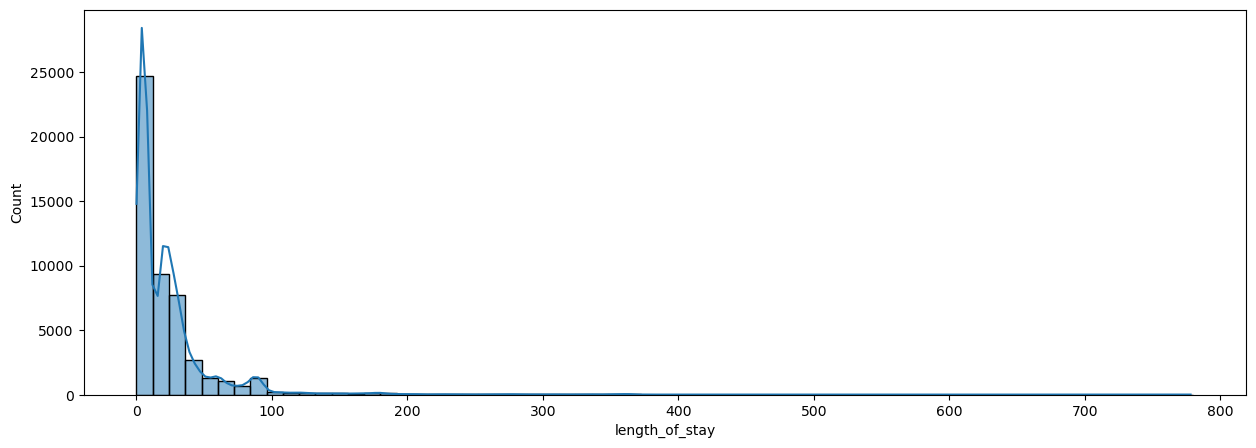

In [17]:
pt.figure(figsize=(15,5))
sns.histplot(data=df, x="length_of_stay", binwidth=12,kde=True)

In [24]:
(df.length_of_stay >200).value_counts()
df[df.length_of_stay > 500].booking_complete.value_counts()

booking_complete
0    9
1    1
Name: count, dtype: int64

In [26]:
df = df[df.length_of_stay < 500]

In [28]:
df.flight_day.value_counts()

flight_day
Mon    8099
Wed    7672
Tue    7671
Thu    7419
Fri    6759
Sun    6553
Sat    5809
Name: count, dtype: int64

In [30]:
mapping = {
    "Mon" : 1,
    "Tue" : 2,
    "Wed" : 3,
    "Thu" : 4,
    "Fri" : 5,
    "Sat" : 6,
    "Sun" : 7
}

df.flight_day = df.flight_day.map(mapping)

C:\Users\ramva\AppData\Local\Temp\ipykernel_12768\1598380213.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.flight_day = df.flight_day.map(mapping)


In [32]:
df.flight_day.value_counts()
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [33]:
df.booking_origin.value_counts()

booking_origin
Australia               17863
Malaysia                 7172
South Korea              4559
Japan                    3884
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

Text(0, 0.5, 'No.of Bookings')

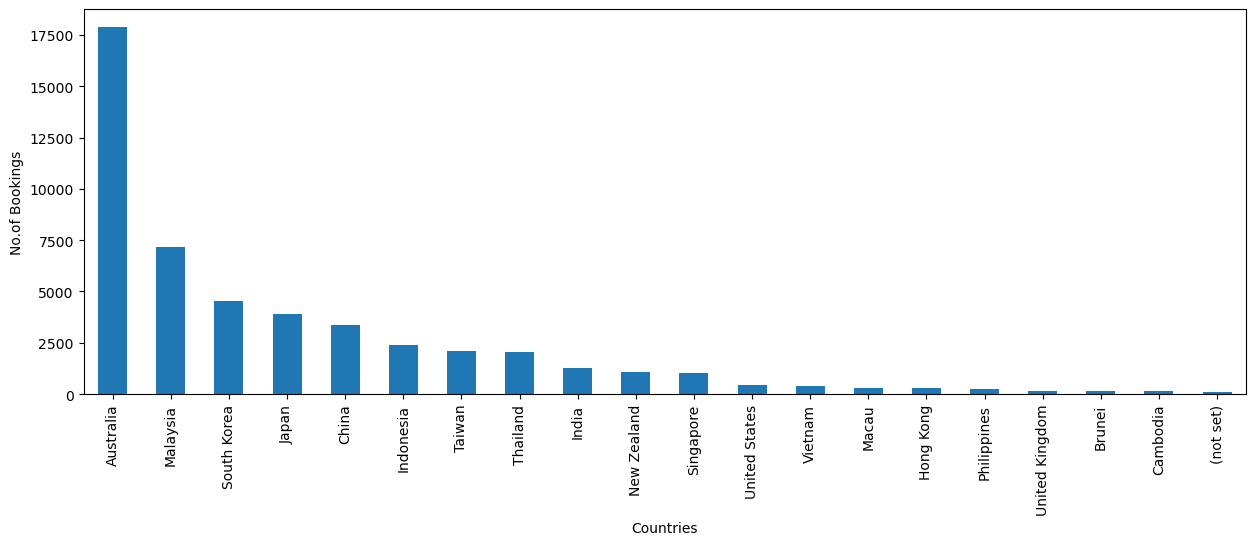

In [34]:
pt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("No.of Bookings")

Text(0, 0.5, 'No.of Bookings')

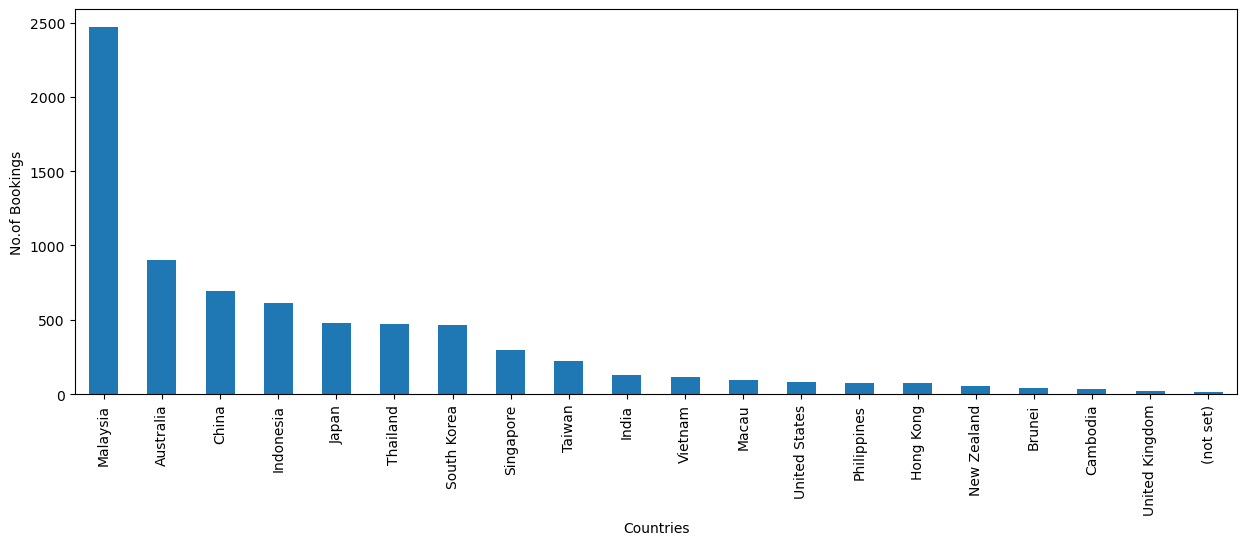

In [35]:
pt.figure(figsize=(15,5))
ax = df[df.booking_complete==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("No.of Bookings")

In [36]:
booking_confirmed = df.booking_complete.value_counts().values[0]/len(df) * 100
booking_unconfirmed = 100 - booking_confirmed

In [37]:
df.to_csv(cwd + "/new_customer_booking.csv")